In [1]:
# This script visualizes head rotation speed

# The purpose is to help determine when participants are transitioning between gaze targets

In [2]:
import re
import matplotlib.pyplot as plt

In [3]:
#define location of data to visualize

# data_dir="C:/Users/gary4/Documents/repos/Recording-And-Analysis-Plugin/Data/group0"
data_dir="Z:/Gary/Research/APlausE-MR_MR4_CollaborativeTelepresenceStudy/gazeAnalysis"
file_name="aplausemr_group0_date20240708_10_42_trial0_experimentcontroller_quantitative_requests_results.csv"

file_path = data_dir + "/" + file_name

In [8]:
# define some data structures for reading data

class HeadRotationResults:
    def __init__(self, desc):
        self.times = []
        self.values = []
        
        # find participant ID for gazer
        participant_label_ends = [m.end() for m in re.finditer('Participant', desc)]
        self.gazer = int(desc[participant_label_ends[0]])
        
    def add_value(self,time,value):
        self.times.append(time)
        self.values.append(value)

In [9]:
# read data into structures

results = []

f = open(file_path, "r")

while True:
    line = f.readline()
    if not line:
        break

    if line.startswith("AnalysisQuery,RotationAnalysis"):
    # if line.startswith("AnalysisQuery,GazeAnalysis"):
        results.append(HeadRotationResults(line))
    elif line.startswith('Time') or not line.strip():
        pass
    else:
        if len(results) > 0:
            line_values = line.split(',')
            results[-1].add_value(float(line_values[0]), float(line_values[1]))
f.close()


IndexError: list index out of range

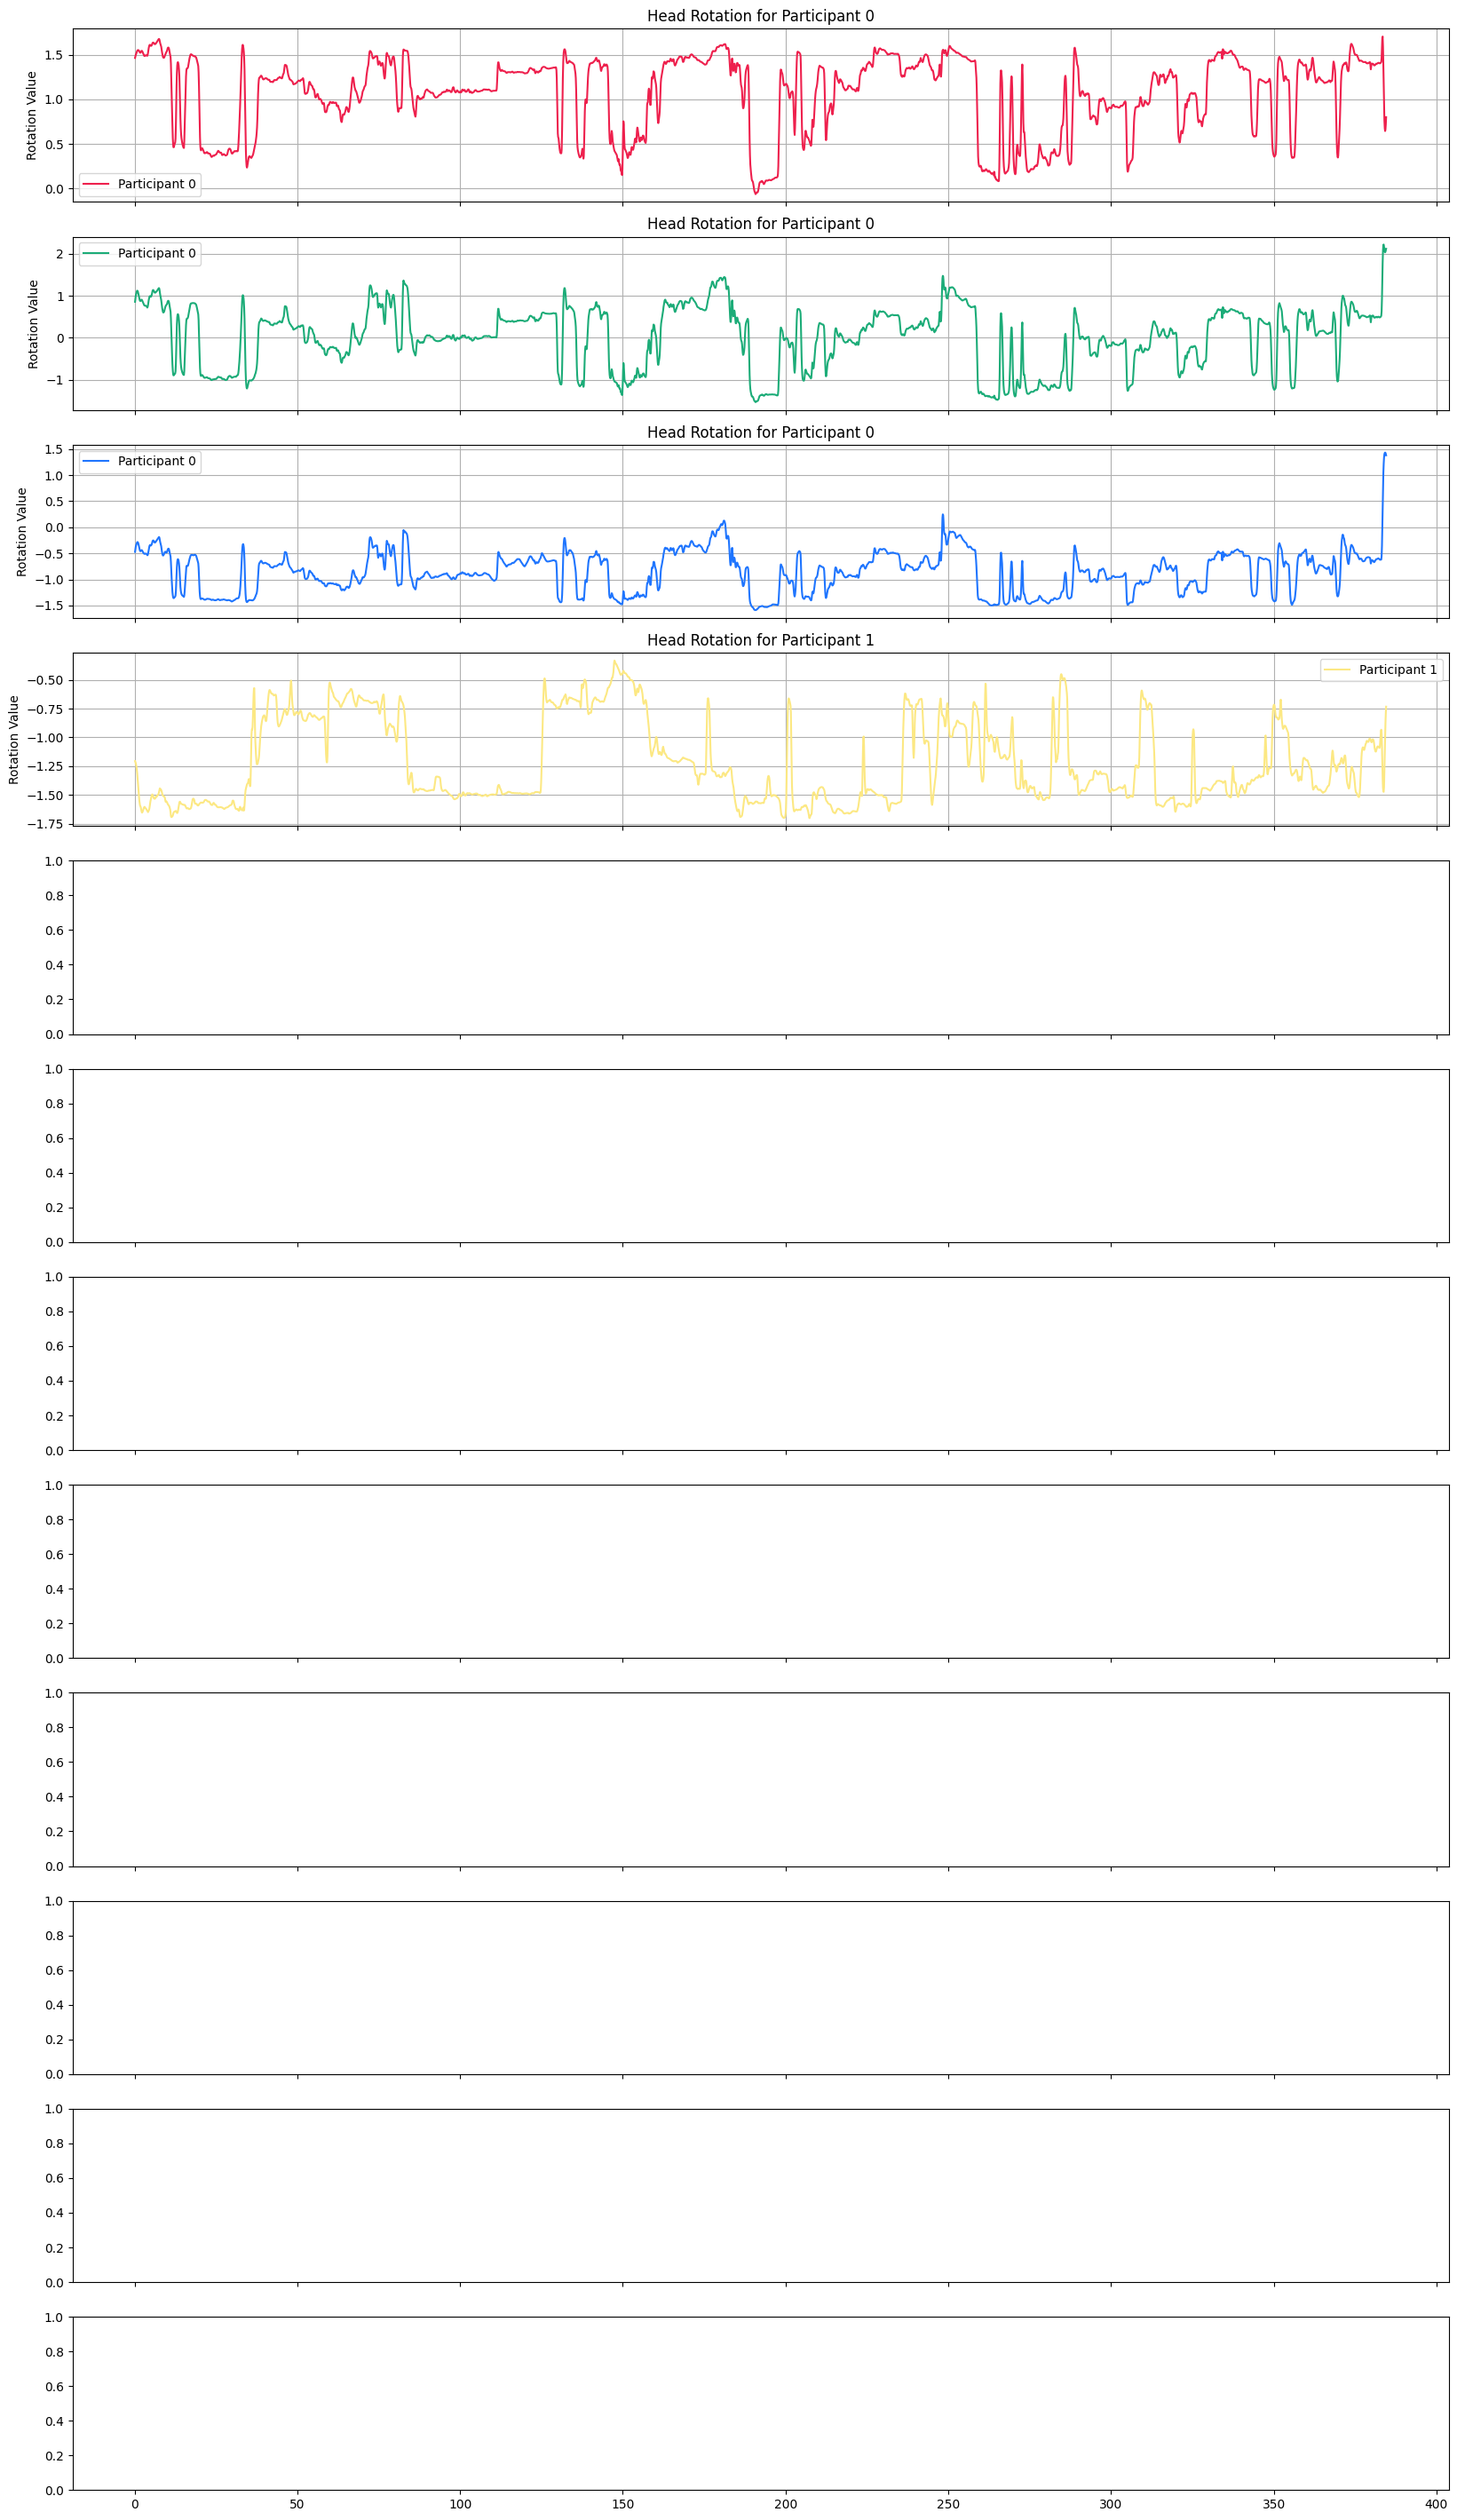

In [10]:
cols = ['#EE204D', '#1CAC78', '#1F75FE', '#FCE883']

# Function to plot multiple HeadRotationResults on different line graphs
def plot_head_rotation_results(results_list):
    num_plots = len(results_list)
    
    # Create subplots
    fig, axes = plt.subplots(num_plots, 1, figsize=(20, num_plots * 3), sharex=True)
    
    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one subplot

    lines = 0
    
    # Plot each HeadRotationResults on a different line graph
    for ax, results in zip(axes, results_list):
        ax.plot(results.times, results.values, label=f'Participant {results.gazer}', color=cols[lines])

        lines += 1
        
        # Customize each subplot
        ax.set_title(f'Head Rotation for Participant {results.gazer}')
        ax.set_ylabel('Rotation Value')
        ax.legend()
        ax.grid(True)
    
    # Set common x-label
    plt.xlabel('Time')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()

    plt.savefig("head_rotation_10hz.pdf")
    
    # Show the plot
    plt.show()

plot_head_rotation_results(results)